In [1]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import seaborn as sns
import json
import os
import deepsig
from IPython.display import display
from matplotlib.lines import Line2D

2023-08-24 23:23:01.002850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 23:23:01.035717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 23:23:01.036310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 23:23:01.848863: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def convert_to_json_of_arrays(array_of_jsons):
    json_of_arrays = {}

    # Iterate through each JSON in the array
    for json_obj in array_of_jsons:
        for key, value in json_obj.items():
            # Check if the key exists in the new JSON, if not, create an array
            if key not in json_of_arrays:
                json_of_arrays[key] = []

            # Append the value to the corresponding array
            json_of_arrays[key].append(value)

    return json_of_arrays

In [3]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

In [4]:
def read_json_files_from_folder(folder_path):
    json_list = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .json extension
        if file_name.endswith(".json"):
            file_path = os.path.join(folder_path, file_name)

            # Read the contents of the JSON file
            with open(file_path, "r") as file:
                try:
                    # Parse the JSON data and append it to the list
                    json_data = json.load(file)
                    json_list.append(json_data)
                except json.JSONDecodeError:
                    # Handle parsing errors, if any
                    print(f"Error parsing JSON from file: {file_name}")

    return json_list

In [5]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'f1_score', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [6]:
results = read_csv_files_from_folder('../2023-07-26/results')
results.replace({'ftl_mlp_initializer': 'Fair Transition Loss', 'adversarial_debiasing_initializer': 'Adversarial Debiasing', 'gerry_fair_classifier_initializer': 'Gerry Fair Classifier', 'prejudice_remover_initializer': 'Prejudice Remover', 'simple_mlp_initializer': 'Standard MLP (baseline)'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Market'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [8]:
display(results)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,FOR,Accuracy,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history
0,0,0.650000,0.477941,0.022839,1.007030,0.006558,0.028241,0.087680,0.804954,0.955882,...,0.000000,0.650000,0.000000,-0.006558,{'dropout': 0.18124389809074126},"[{'overall_acc': 0.59375, 'bal_acc': 0.4481132...",mcc_parity,Standard MLP (baseline),German Credit,"{'loss': [0.7094872196515402, 0.64226885371738..."
1,1,0.645000,0.484962,0.073451,1.064832,0.059217,0.045977,0.077539,0.806250,0.969925,...,0.000000,0.645000,0.000000,-0.059217,"{'dropout': 0.022732599406043996, 'privileged_...","[{'overall_acc': 0.00625, 'bal_acc': 0.0043859...",mcc_parity,Fair Transition Loss,German Credit,"{'loss': [0.8503885070482889, 0.78124442100524..."
2,2,0.740000,0.659133,0.025781,0.954128,0.038462,0.017416,0.092947,0.823129,0.937984,...,0.228571,0.740000,0.400810,0.362348,{'adversary_loss_weight': 0.6148404367300289},"[{'overall_acc': 0.70625, 'bal_acc': 0.5580357...",mcc_parity,Adversarial Debiasing,German Credit,NaN
3,3,0.545000,0.397810,0.070884,0.895425,0.077859,0.056402,0.199996,0.775801,0.795620,...,0.000000,0.545000,0.000000,-0.077859,{'eta': 49.471477392162484},"[{'overall_acc': 0.56875, 'bal_acc': 0.4136363...",mcc_parity,Prejudice Remover,German Credit,NaN
4,4,0.615000,0.448905,0.066751,0.894180,0.087912,0.050342,0.121159,0.828283,0.897810,...,0.000000,0.615000,0.000000,-0.066751,{'dropout': 0.0037868792501197348},"[{'overall_acc': 0.56875, 'bal_acc': 0.4099099...",mcc_odds,Standard MLP (baseline),German Credit,"{'loss': [0.7087434199121263, 0.61068538427352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,25,0.896851,0.669304,0.057653,2.118719,0.074544,0.087314,0.093049,0.472758,0.364341,...,0.086635,0.896851,0.445599,0.809537,"{'C': 10.459577021264977, 'gamma': 0.1}","[{'overall_acc': 0.8993439934399344, 'bal_acc'...",acc_opportunity,Gerry Fair Classifier,Bank Market,NaN
1753,26,0.896359,0.753549,0.072641,2.153847,0.133189,0.120516,0.075922,0.584757,0.560453,...,0.064991,0.896359,0.526321,0.775843,{'dropout': 0.000321942353699714},"[{'overall_acc': 0.9093890938909389, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Bank Market,"{'loss': [0.2854798949427075, 0.22084286485976..."
1754,27,0.898655,0.696844,0.053642,1.420554,0.034509,0.099174,0.086198,0.514914,0.427083,...,0.078684,0.898655,0.473519,0.799482,"{'dropout': 0.014472416047403187, 'privileged_...","[{'overall_acc': 0.8511685116851169, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Bank Market,"{'loss': [0.49211953761153904, 0.4700222834873..."
1755,28,0.901607,0.718345,0.145878,0.755483,0.022450,0.286523,0.081914,0.551570,0.471867,...,0.074522,0.901607,0.507223,0.615084,{'adversary_loss_weight': 0.8391213408528397},"[{'overall_acc': 0.8987289872898729, 'bal_acc'...",acc_opportunity,Adversarial Debiasing,Bank Market,NaN


,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history,Performance,Fairness
0,0,0.650000,0.477941,0.022839,1.007030,0.006558,0.028241,0.087680,0.804954,0.955882,...,0.000000,-0.006558,{'dropout': 0.18124389809074126},"[{'overall_acc': 0.59375, 'bal_acc': 0.4481132...",mcc_parity,Standard MLP (baseline),German Credit,"{'loss': [0.7094872196515402, 0.64226885371738...",0.000000,0.006558
1,1,0.645000,0.484962,0.073451,1.064832,0.059217,0.045977,0.077539,0.806250,0.969925,...,0.000000,-0.059217,"{'dropout': 0.022732599406043996, 'privileged_...","[{'overall_acc': 0.00625, 'bal_acc': 0.0043859...",mcc_parity,Fair Transition Loss,German Credit,"{'loss': [0.8503885070482889, 0.78124442100524...",0.000000,0.059217
2,2,0.740000,0.659133,0.025781,0.954128,0.038462,0.017416,0.092947,0.823129,0.937984,...,0.400810,0.362348,{'adversary_loss_weight': 0.6148404367300289},"[{'overall_acc': 0.70625, 'bal_acc': 0.5580357...",mcc_parity,Adversarial Debiasing,German Credit,NaN,0.400810,0.038462
3,3,0.545000,0.397810,0.070884,0.895425,0.077859,0.056402,0.199996,0.775801,0.795620,...,0.000000,-0.077859,{'eta': 49.471477392162484},"[{'overall_acc': 0.56875, 'bal_acc': 0.4136363...",mcc_parity,Prejudice Remover,German Credit,NaN,0.000000,0.077859
4,4,0.615000,0.448905,0.066751,0.894180,0.087912,0.050342,0.121159,0.828283,0.897810,...,0.000000,-0.066751,{'dropout': 0.0037868792501197348},"[{'overall_acc': 0.56875, 'bal_acc': 0.4099099...",mcc_odds,Standard MLP (baseline),German Credit,"{'loss': [0.7087434199121263, 0.61068538427352...",0.000000,0.066751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,25,0.896851,0.669304,0.057653,2.118719,0.074544,0.087314,0.093049,0.472758,0.364341,...,0.445599,0.809537,"{'C': 10.459577021264977, 'gamma': 0.1}","[{'overall_acc': 0.8993439934399344, 'bal_acc'...",acc_opportunity,Gerry Fair Classifier,Bank Market,NaN,0.896851,0.087314
1753,26,0.896359,0.753549,0.072641,2.153847,0.133189,0.120516,0.075922,0.584757,0.560453,...,0.526321,0.775843,{'dropout': 0.000321942353699714},"[{'overall_acc': 0.9093890938909389, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Bank Market,"{'loss': [0.2854798949427075, 0.22084286485976...",0.896359,0.120516
1754,27,0.898655,0.696844,0.053642,1.420554,0.034509,0.099174,0.086198,0.514914,0.427083,...,0.473519,0.799482,"{'dropout': 0.014472416047403187, 'privileged_...","[{'overall_acc': 0.8511685116851169, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Bank Market,"{'loss': [0.49211953761153904, 0.4700222834873...",0.898655,0.099174
1755,28,0.901607,0.718345,0.145878,0.755483,0.022450,0.286523,0.081914,0.551570,0.471867,...,0.507223,0.615084,{'adversary_loss_weight': 0.8391213408528397},"[{'overall_acc': 0.8987289872898729, 'bal_acc'...",acc_opportunity,Adversarial Debiasing,Bank Market,NaN,0.901607,0.286523


In [10]:
datasets = results['dataset'].unique().tolist()
datasets

['German Credit', 'Bank Market', 'Adult Income', 'Compas Recidivism']

In [37]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [40]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}

['Max(Mathew Correlation - Statistical Parity)',
 'Max(Mathew Correlation - Equalized Odds)',
 'Max(Mathew Correlation - Equal Opportunity)',
 'Max(Accuracy - Statistical Parity)',
 'Max(Accuracy - Equalized Odds)',
 'Max(Accuracy - Equal Opportunity)']

In [42]:
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

display(results)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history,Performance,Fairness,Fitness Rule
0,0,0.650000,0.477941,0.022839,1.007030,0.006558,0.028241,0.087680,0.804954,0.955882,...,-0.006558,{'dropout': 0.18124389809074126},"[{'overall_acc': 0.59375, 'bal_acc': 0.4481132...",mcc_parity,Standard MLP (baseline),German Credit,"{'loss': [0.7094872196515402, 0.64226885371738...",0.000000,0.006558,Max(Mathew Correlation - Statistical Parity)
1,1,0.645000,0.484962,0.073451,1.064832,0.059217,0.045977,0.077539,0.806250,0.969925,...,-0.059217,"{'dropout': 0.022732599406043996, 'privileged_...","[{'overall_acc': 0.00625, 'bal_acc': 0.0043859...",mcc_parity,Fair Transition Loss,German Credit,"{'loss': [0.8503885070482889, 0.78124442100524...",0.000000,0.059217,Max(Mathew Correlation - Statistical Parity)
2,2,0.740000,0.659133,0.025781,0.954128,0.038462,0.017416,0.092947,0.823129,0.937984,...,0.362348,{'adversary_loss_weight': 0.6148404367300289},"[{'overall_acc': 0.70625, 'bal_acc': 0.5580357...",mcc_parity,Adversarial Debiasing,German Credit,NaN,0.400810,0.038462,Max(Mathew Correlation - Statistical Parity)
3,3,0.545000,0.397810,0.070884,0.895425,0.077859,0.056402,0.199996,0.775801,0.795620,...,-0.077859,{'eta': 49.471477392162484},"[{'overall_acc': 0.56875, 'bal_acc': 0.4136363...",mcc_parity,Prejudice Remover,German Credit,NaN,0.000000,0.077859,Max(Mathew Correlation - Statistical Parity)
4,4,0.615000,0.448905,0.066751,0.894180,0.087912,0.050342,0.121159,0.828283,0.897810,...,-0.066751,{'dropout': 0.0037868792501197348},"[{'overall_acc': 0.56875, 'bal_acc': 0.4099099...",mcc_odds,Standard MLP (baseline),German Credit,"{'loss': [0.7087434199121263, 0.61068538427352...",0.000000,0.066751,Max(Mathew Correlation - Equalized Odds)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,25,0.896851,0.669304,0.057653,2.118719,0.074544,0.087314,0.093049,0.472758,0.364341,...,0.809537,"{'C': 10.459577021264977, 'gamma': 0.1}","[{'overall_acc': 0.8993439934399344, 'bal_acc'...",acc_opportunity,Gerry Fair Classifier,Bank Market,NaN,0.896851,0.087314,Max(Accuracy - Equal Opportunity)
1753,26,0.896359,0.753549,0.072641,2.153847,0.133189,0.120516,0.075922,0.584757,0.560453,...,0.775843,{'dropout': 0.000321942353699714},"[{'overall_acc': 0.9093890938909389, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Bank Market,"{'loss': [0.2854798949427075, 0.22084286485976...",0.896359,0.120516,Max(Accuracy - Equal Opportunity)
1754,27,0.898655,0.696844,0.053642,1.420554,0.034509,0.099174,0.086198,0.514914,0.427083,...,0.799482,"{'dropout': 0.014472416047403187, 'privileged_...","[{'overall_acc': 0.8511685116851169, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Bank Market,"{'loss': [0.49211953761153904, 0.4700222834873...",0.898655,0.099174,Max(Accuracy - Equal Opportunity)
1755,28,0.901607,0.718345,0.145878,0.755483,0.022450,0.286523,0.081914,0.551570,0.471867,...,0.615084,{'adversary_loss_weight': 0.8391213408528397},"[{'overall_acc': 0.8987289872898729, 'bal_acc'...",acc_opportunity,Adversarial Debiasing,Bank Market,NaN,0.901607,0.286523,Max(Accuracy - Equal Opportunity)


In [12]:
methods = results['method'].unique().tolist()
methods

['Standard MLP (baseline)',
 'Fair Transition Loss',
 'Adversarial Debiasing',
 'Prejudice Remover',
 'Gerry Fair Classifier']

In [13]:
fitness_rule = fitness_rules[3]
by_fitness_rule = results[results.fitness_rule == fitness_rule]
display(by_fitness_rule)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history,Performance,Fairness
12,12,0.620000,0.430556,0.057987,0.919838,0.062861,0.010419,0.148340,0.835017,0.861111,...,0.000000,0.557139,{'dropout': 0.09770346081898117},"[{'overall_acc': 0.65625, 'bal_acc': 0.4487179...",acc_parity,Standard MLP (baseline),German Credit,"{'loss': [0.7925180620617337, 0.63783704969618...",0.620000,0.062861
13,13,0.700000,0.500000,0.000000,1.000000,0.000000,0.000000,0.057550,0.823529,1.000000,...,0.000000,0.700000,"{'dropout': 0.03328906217052272, 'privileged_d...","[{'overall_acc': 0.0, 'bal_acc': 0.0, 'avg_odd...",acc_parity,Fair Transition Loss,German Credit,"{'loss': [0.9816806660758124, 0.90609514978196...",0.700000,0.000000
14,14,0.745000,0.621540,0.447826,0.582168,0.408547,0.285714,0.111541,0.836013,0.915493,...,0.304777,0.336453,{'adversary_loss_weight': 0.12319062993985432},"[{'overall_acc': 0.78125, 'bal_acc': 0.7260869...",acc_parity,Adversarial Debiasing,German Credit,NaN,0.745000,0.408547
15,15,0.555000,0.402174,0.159695,0.789286,0.162684,0.195652,0.192517,0.787234,0.804348,...,0.000000,0.392316,{'eta': 0.9097527323582657},"[{'overall_acc': 0.5375, 'bal_acc': 0.40952380...",acc_parity,Prejudice Remover,German Credit,NaN,0.555000,0.162684
39,15,0.902591,0.662425,0.035370,2.139431,0.065825,0.053432,0.090167,0.462929,0.345013,...,0.448254,0.836766,"{'C': 0.6338720967430849, 'gamma': 0.1}","[{'overall_acc': 0.8888888888888888, 'bal_acc'...",acc_parity,Gerry Fair Classifier,Bank Market,NaN,0.902591,0.065825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,15,0.893244,0.658298,0.031811,1.975081,0.062064,0.042286,0.097964,0.453401,0.340909,...,0.430395,0.831180,"{'C': 19.825802554133972, 'gamma': 0.001}","[{'overall_acc': 0.8929889298892989, 'bal_acc'...",acc_parity,Gerry Fair Classifier,Bank Market,NaN,0.893244,0.062064
1743,16,0.892588,0.721375,0.036710,1.621237,0.063865,0.031354,0.084432,0.544189,0.489362,...,0.488114,0.828723,{'dropout': 0.04183345334904933},"[{'overall_acc': 0.9020090200902009, 'bal_acc'...",acc_parity,Standard MLP (baseline),Bank Market,"{'loss': [0.2847036751947133, 0.22548435456193...",0.892588,0.063865
1744,17,0.893244,0.618394,0.047285,0.833989,0.007465,0.079024,0.103608,0.371014,0.251969,...,0.378632,0.885779,"{'dropout': 0.14490142811852544, 'privileged_d...","[{'overall_acc': 0.12669126691266913, 'bal_acc...",acc_parity,Fair Transition Loss,Bank Market,"{'loss': [0.6040555901839344, 0.58714896115750...",0.893244,0.007465
1745,18,0.896031,0.720386,0.090692,1.974301,0.094298,0.164313,0.084231,0.549716,0.481943,...,0.498565,0.801734,{'adversary_loss_weight': 0.5296349095429117},"[{'overall_acc': 0.8987289872898729, 'bal_acc'...",acc_parity,Adversarial Debiasing,Bank Market,NaN,0.896031,0.094298


<Axes: xlabel='fitness', ylabel='method'>

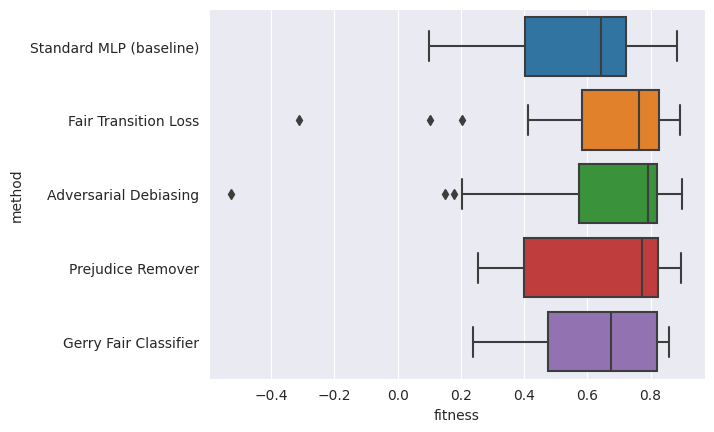

In [14]:
sns.boxplot(by_fitness_rule, x='fitness', y='method')

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='fitness', ylabel='method'>

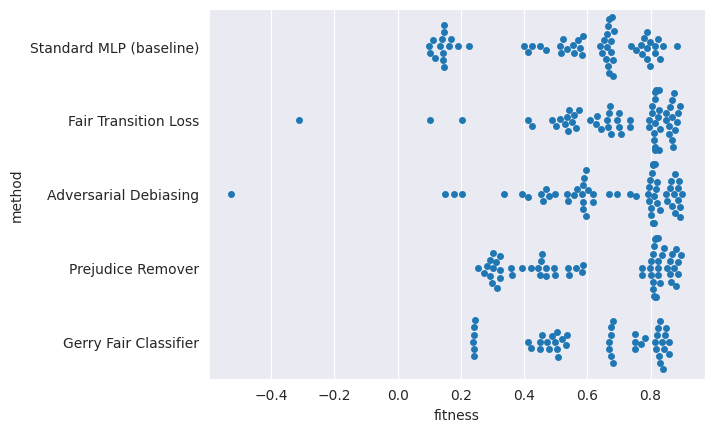

In [15]:
sns.swarmplot(by_fitness_rule, x='fitness', y='method')

<Axes: xlabel='fitness', ylabel='method'>

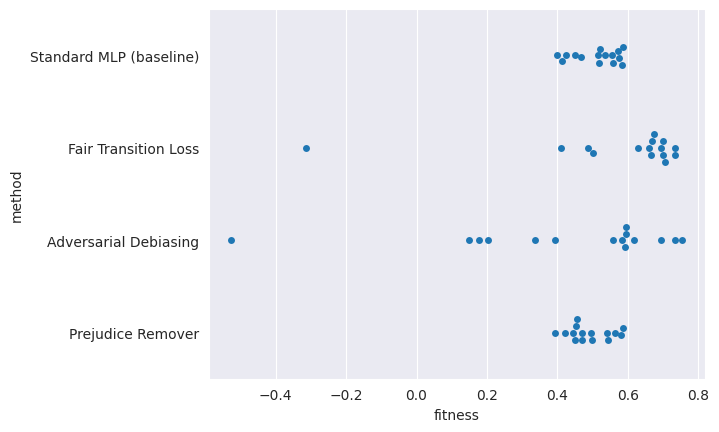

In [16]:
sns.swarmplot(by_fitness_rule[by_fitness_rule.dataset == datasets[0]], x='fitness', y='method')

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decr

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


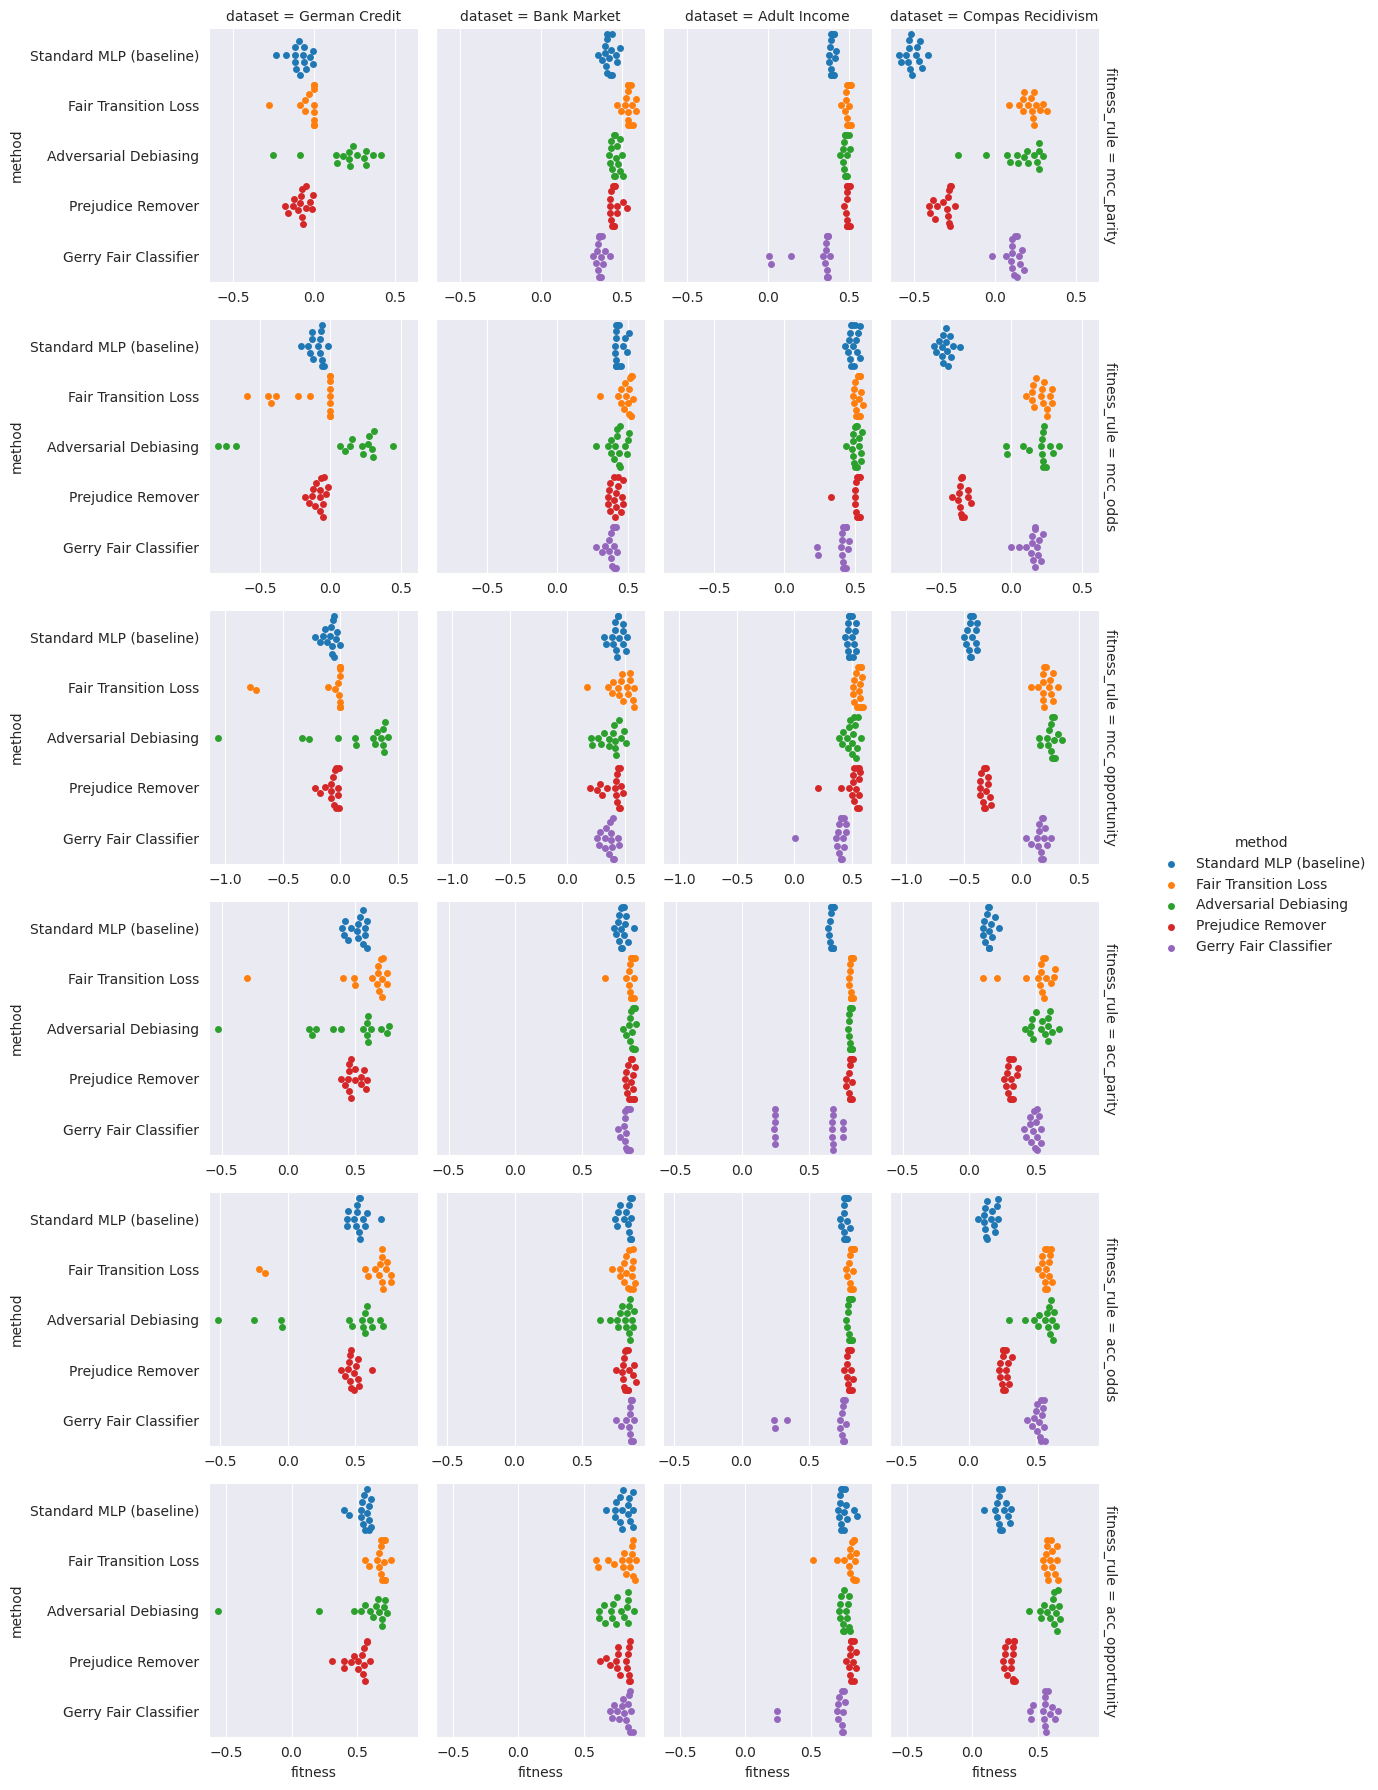

In [17]:
g = sns.FacetGrid(results, col="dataset", row='fitness_rule', hue='method', margin_titles=True, sharex='row', sharey='row')
g.map(sns.swarmplot, 'fitness', 'method')
g.add_legend()

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; 

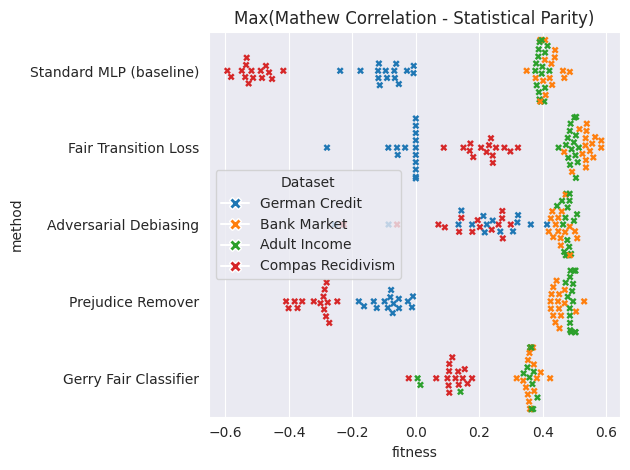

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


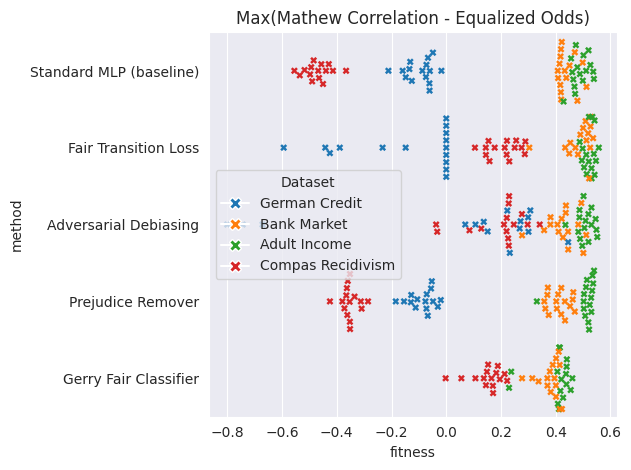

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


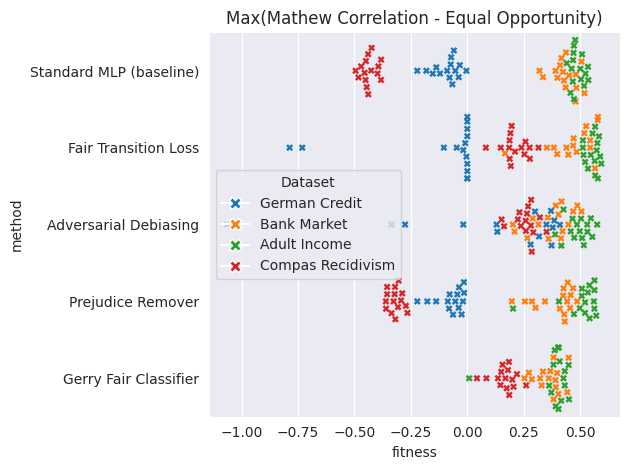

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.7% of the points cannot be placed; 

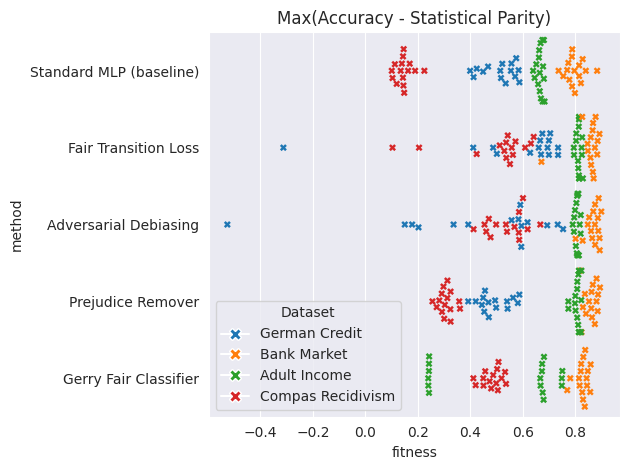

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; y

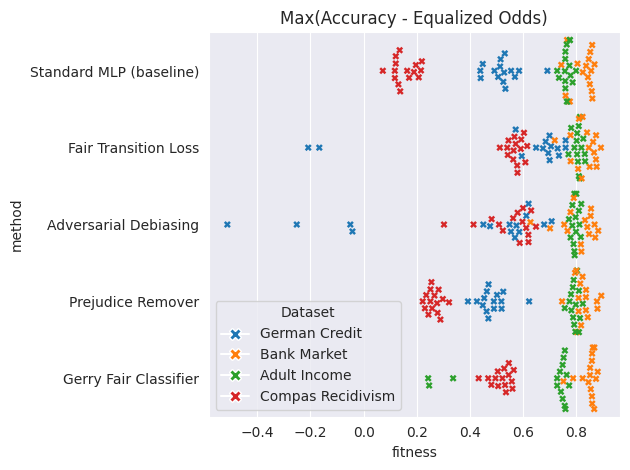

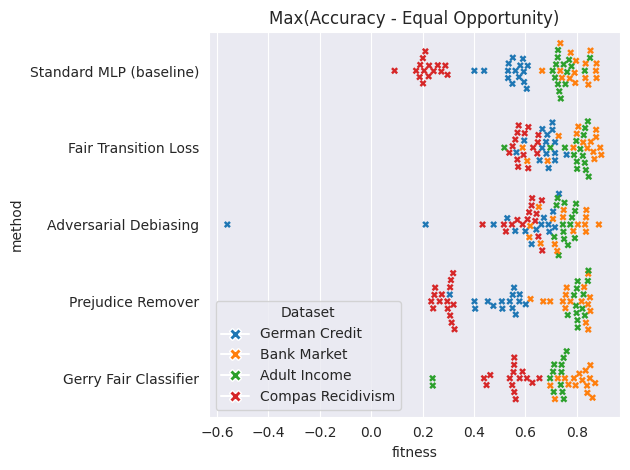

In [18]:
palette = sns.color_palette()
for fitness_rule in fitness_rules:
    by_fitness_rule = results[results.fitness_rule == fitness_rule]    
    
    ax = sns.swarmplot(data=by_fitness_rule, hue_order=datasets,
                  x='fitness', y='method', marker='X', hue='dataset' )
    
    legend_handles = [Line2D([0], [0], marker='X', color='w', label=dataset,
                             markerfacecolor=palette[i], markersize=8) for i, dataset in enumerate(datasets)]

    ax.legend(handles=legend_handles, title='Dataset')
    plt.title('Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule])
    plt.tight_layout()
    plt.show()

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.9% of the points cannot be place

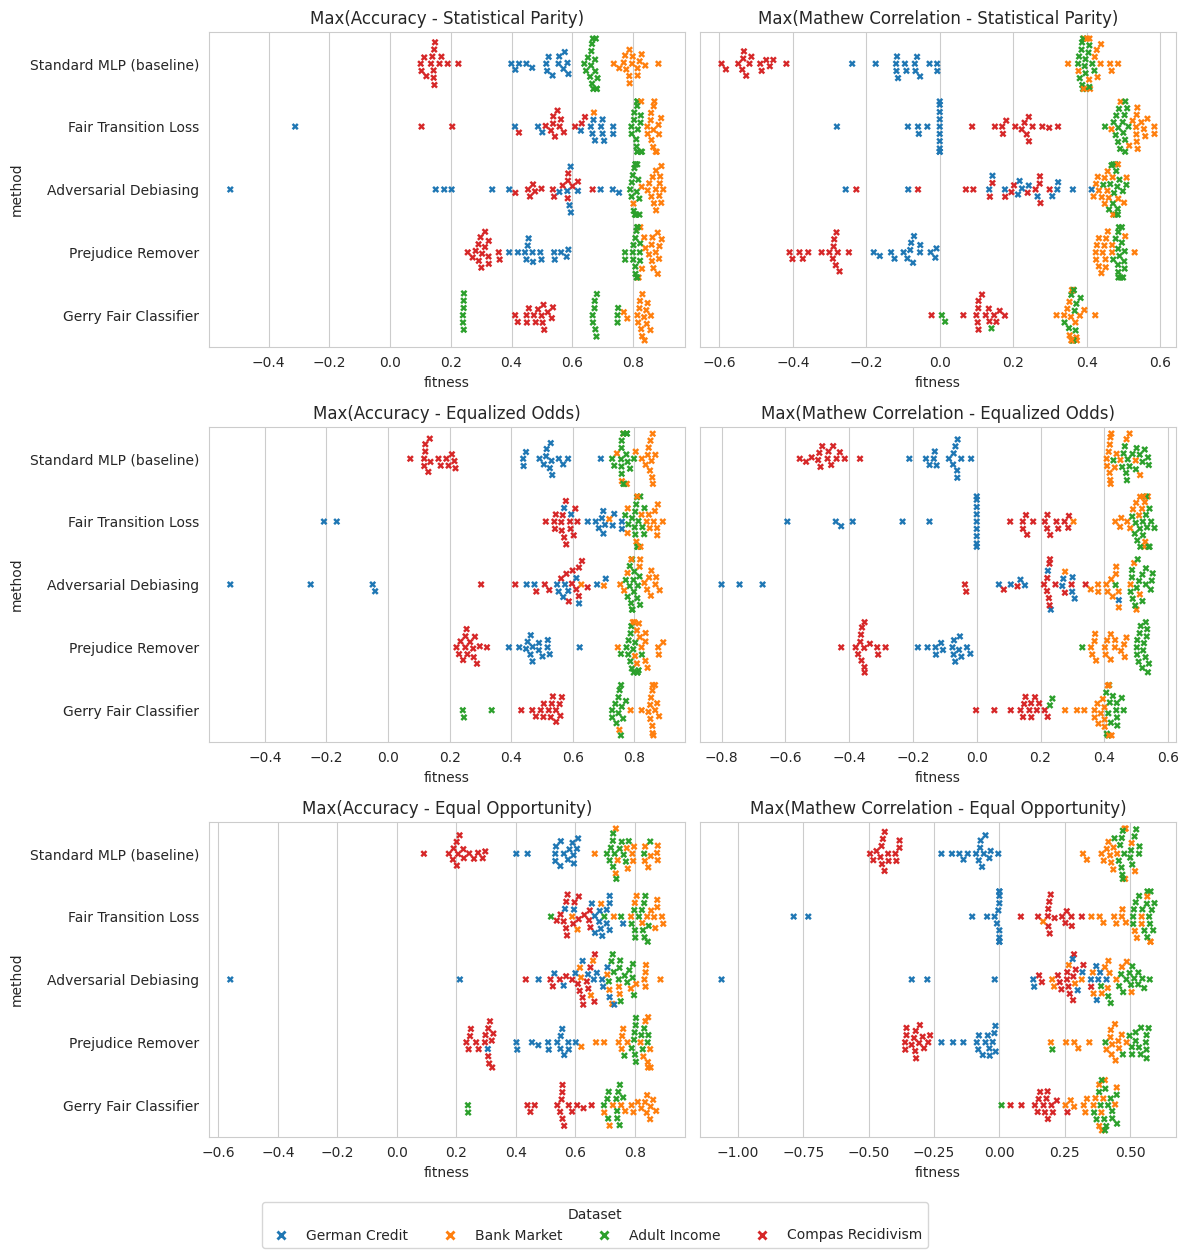

<Figure size 640x480 with 0 Axes>

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.7)

palette = sns.color_palette()
legend_handles = [Line2D([0], [0], marker='X', color='w', label=dataset,
                             markerfacecolor=palette[i], markersize=8) for i, dataset in enumerate(datasets)]

fitness_rules = [   'acc_parity'        , 'mcc_parity',
                    'acc_odds'          , 'mcc_odds',
                    'acc_opportunity'   , 'mcc_opportunity']

for fitness_rule, ax in zip(fitness_rules, axes.flatten()):
    by_fitness_rule = results[results.fitness_rule == fitness_rule]    
    
    sns.swarmplot(data=by_fitness_rule, hue_order=datasets, legend=False,
                  x='fitness', y='method', marker='X', hue='dataset', ax=ax )

    ax.set_title('Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule])
    
    # Remove y-ticks from the second column
    if ax.get_subplotspec().colspan.start == 1:
        ax.set_yticks([])
        ax.set_ylabel('')

fig.legend(handles=legend_handles, title='Dataset', loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(datasets))
plt.tight_layout()
plt.show()
plt.savefig('swarmplot_complete_1.png')

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be placed

AttributeError: module 'matplotlib.pyplot' has no attribute 'on'

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 17.5% of the points cannot be place

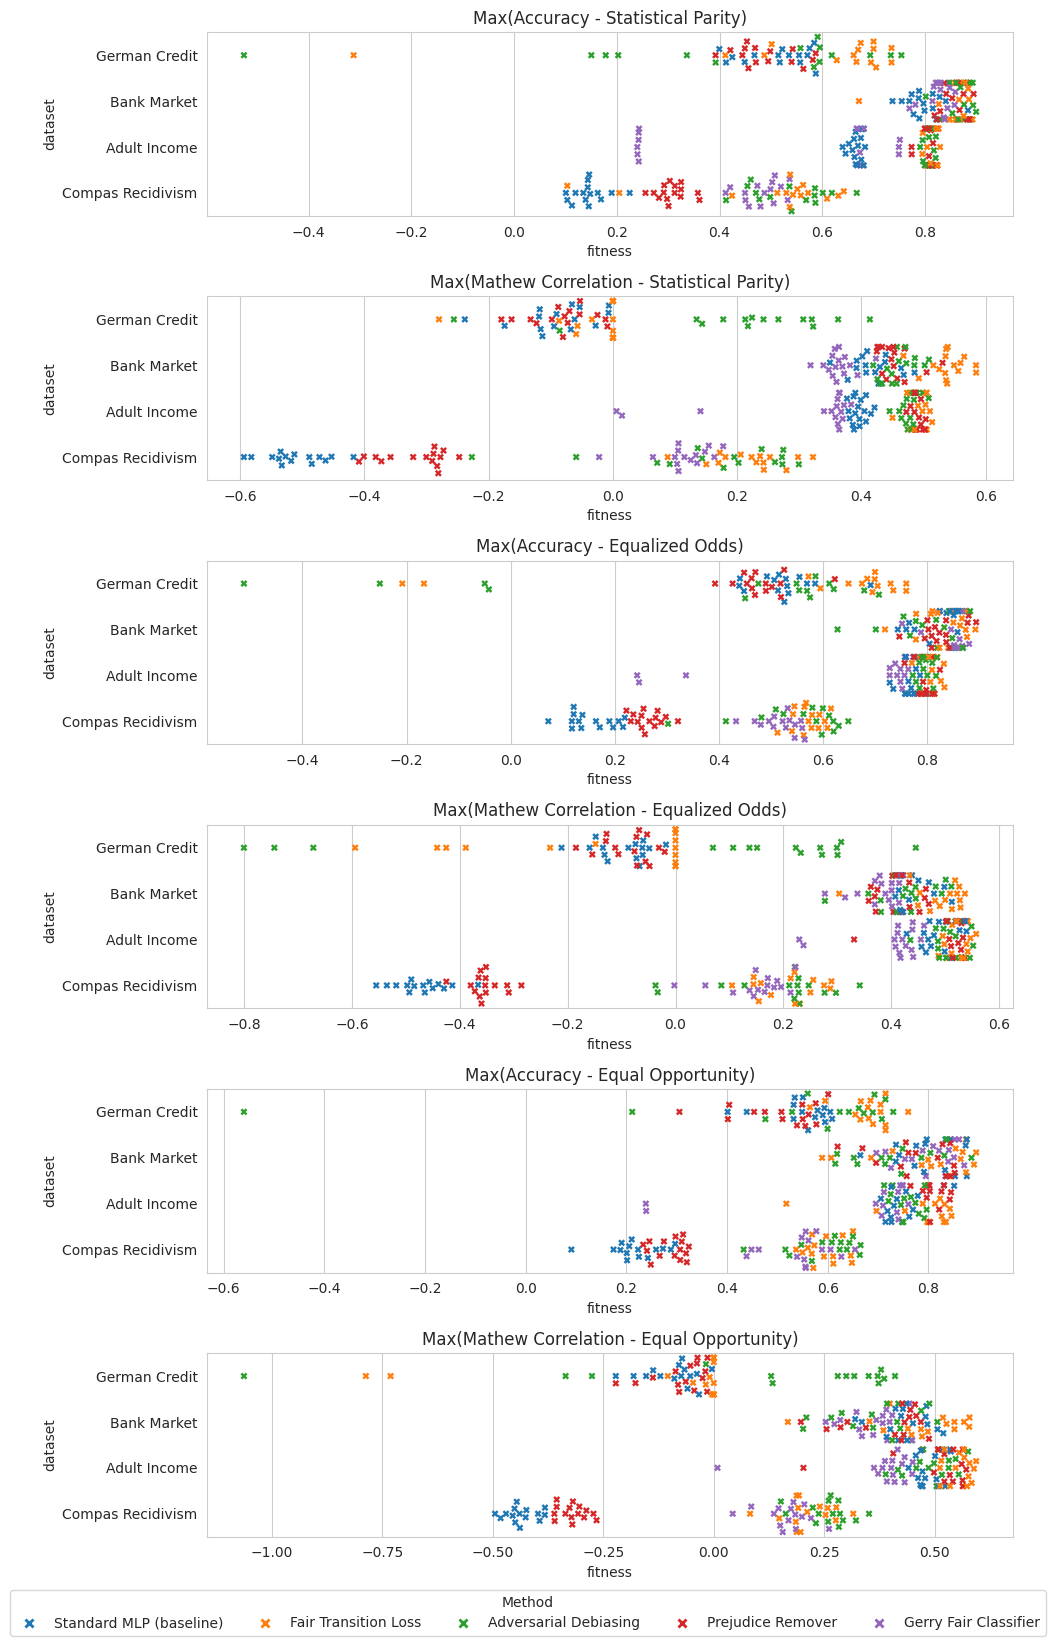

In [72]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 16))
fig.subplots_adjust(hspace=0.7)

palette = sns.color_palette()
legend_handles = [Line2D([0], [0], marker='X', color='w', label=method,
                             markerfacecolor=palette[i], markersize=8) for i, method in enumerate(methods)]

fitness_rules = [   'acc_parity'        , 'mcc_parity',
                    'acc_odds'          , 'mcc_odds',
                    'acc_opportunity'   , 'mcc_opportunity']

for fitness_rule, ax in zip(fitness_rules, axes.flatten()):
    by_fitness_rule = results[results.fitness_rule == fitness_rule]

    sns.swarmplot(data=by_fitness_rule, hue_order=methods, legend=False,
                  x='fitness', y='dataset', marker='X', hue='method', ax=ax )

    ax.set_title('Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule])

    # Remove y-ticks from the second column
    if ax.get_subplotspec().colspan.start == 1:
        ax.set_yticks([])
        ax.set_ylabel('')

fig.legend(handles=legend_handles, title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=len(methods))
plt.tight_layout()
plt.on(fig)
plt.savefig('swarmplot_complete_2.png')
plt.show()

/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/share/virtualenvs/FairnessComparsion-pyUF7MKI/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be place

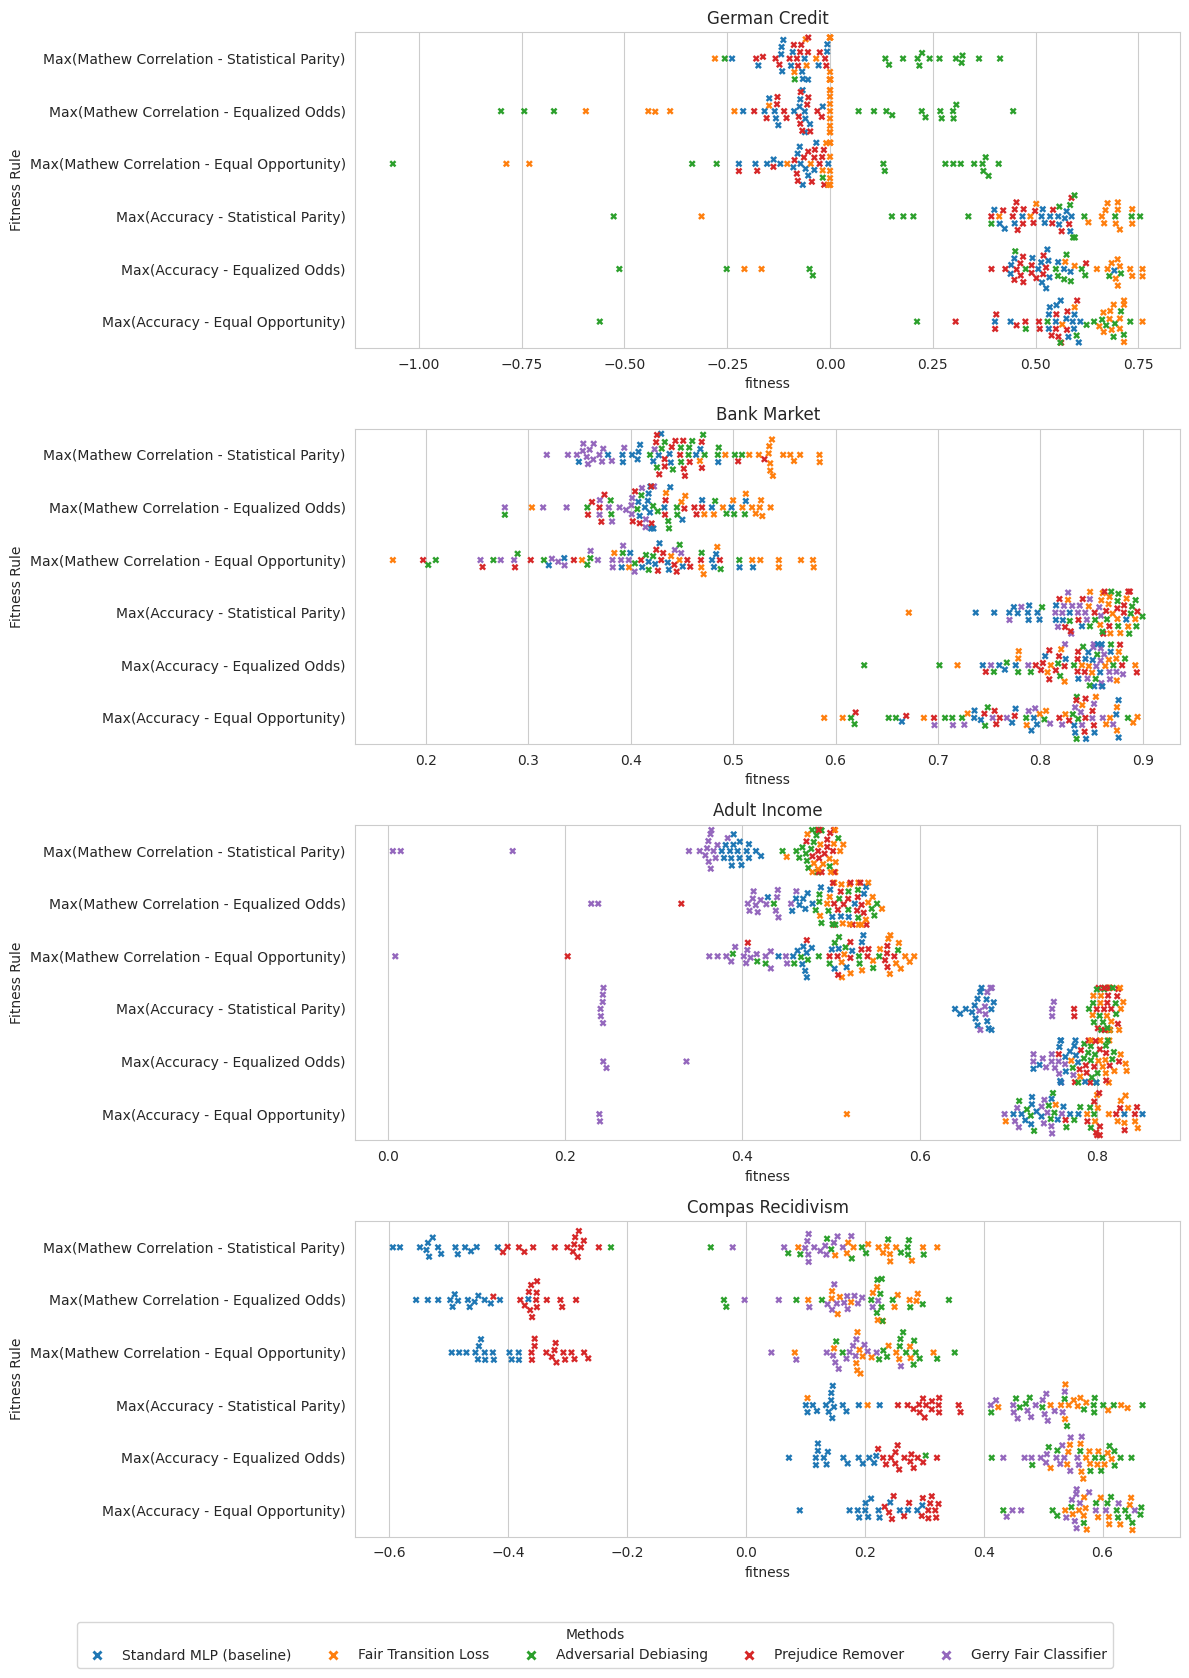

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
fig.subplots_adjust(hspace=0.7)

palette = sns.color_palette()
legend_handles = [Line2D([0], [0], marker='X', color='w', label=method,
                             markerfacecolor=palette[i], markersize=8) for i, method in enumerate(methods)]

fitness_rules = [   'acc_parity'        , 'mcc_parity',
                    'acc_odds'          , 'mcc_odds',
                    'acc_opportunity'   , 'mcc_opportunity']


for dataset, ax in zip(datasets, axes.flatten()):
    by_dataset = results[results.dataset == dataset]

    sns.swarmplot(data=by_dataset, hue_order=methods, legend=False,
                  x='fitness', y='Fitness Rule', marker='X', hue='method', ax=ax)

    ax.set_title(dataset)

    # Remove y-ticks from the second column
    if ax.get_subplotspec().colspan.start == 1:
        ax.set_yticks([])
        ax.set_ylabel('')

fig.legend(handles=legend_handles, title='Methods', loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(methods))
plt.tight_layout()
plt.savefig('swarmplot_complete_3.png')
plt.show()


In [0]:
g = sns.FacetGrid(results, col="dataset", row='fitness_rule', hue='method', margin_titles=True, sharex='row', sharey='row')
g.map(sns.scatterplot, 'Fairness', 'Performance')
g.add_legend()

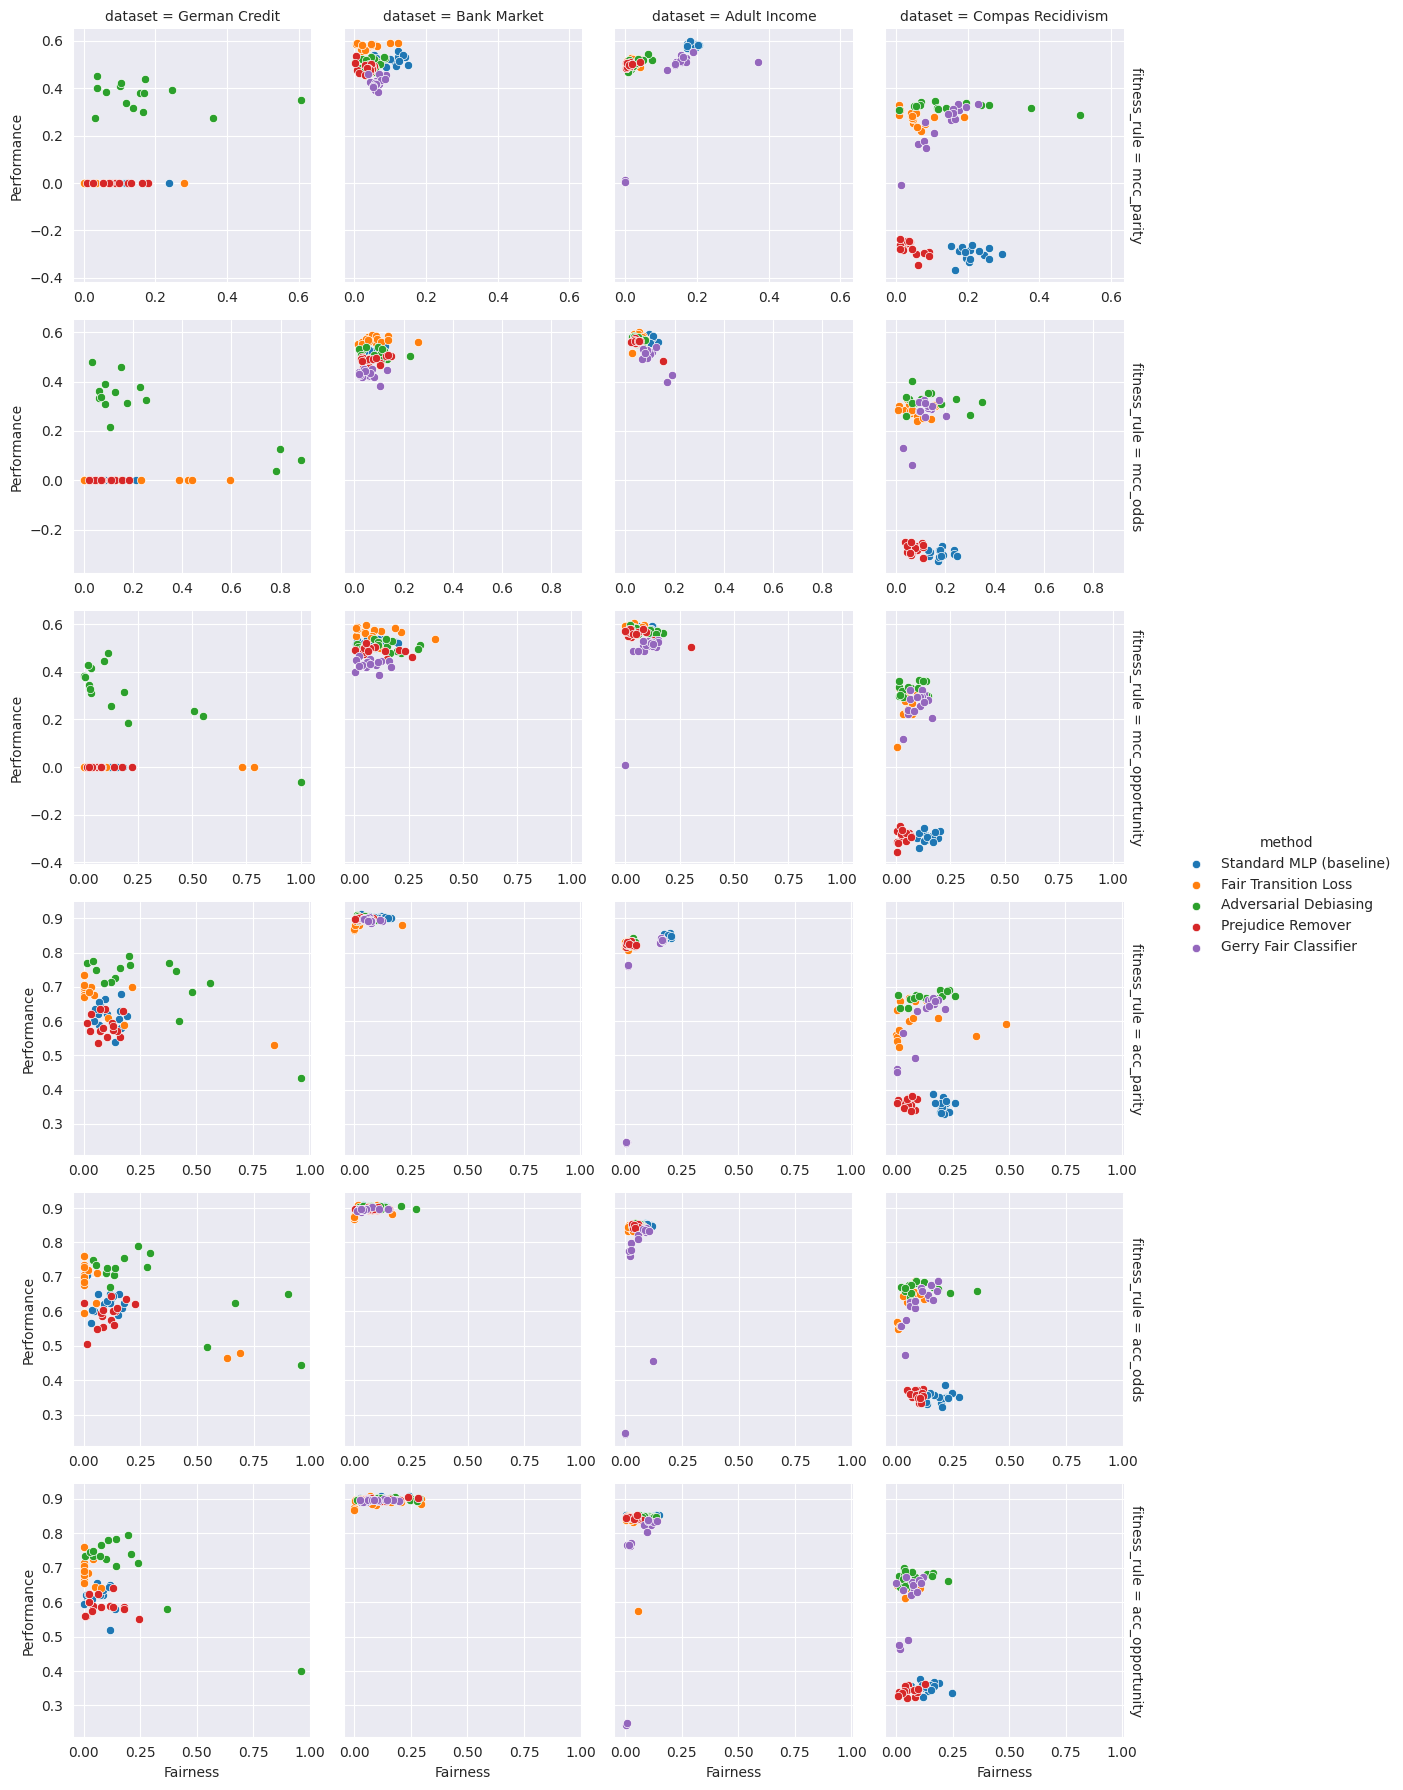